In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.dcceew.gov.au/climate-change/policy/climate-science/understanding-climate-change#:~:text=The%20greenhouse%20effect%20is%20a,re%2Dradiated%20by%20greenhouse%20gases.

## 1: Introduction

## 2: Data Start

In [14]:
df_atmosphere: pd.DataFrame = (
    pd.read_csv("../../homework/hw1b/hw-01b-datasets/atmospheric-concentration-of-carbon-dioxide-5.csv")
)
df_atmosphere.sample(5, random_state=123)

,Year:year,Value:number,Polutant:text
30,1900,295.80,CO2 (ppm)
72,2004,376.61,CO2 (ppm)
242,2000,316.14,N2O (ppb)
125,1940,1102.40,CH4 (ppb)
201,1885,278.70,N2O (ppb)


In [15]:
df_atmosphere_co2: pd.DataFrame = df_atmosphere[df_atmosphere["Polutant:text"] == "CO2 (ppm)"]
df_atmosphere_co2.sample(5, random_state=123)

,Year:year,Value:number,Polutant:text
4,1770,278.60,CO2 (ppm)
84,2016,402.87,CO2 (ppm)
56,1988,350.93,CO2 (ppm)
35,1925,305.00,CO2 (ppm)
45,1975,331.30,CO2 (ppm)


In [16]:
df_temp: pd.DataFrame = pd.read_csv("../../homework/hw1b/hw-01b-datasets/global-temperature.csv", skiprows=range(1,5))
df_temp.sample(10)

,Global Land and Ocean August Temperature Anomalies
1991,0.37
1889,-0.12
1990,0.38
1916,-0.27
1989,0.32
1893,-0.28
2014,0.83
1952,0.06
1896,-0.03
1945,0.29


In [17]:
# Reset the index for df_temp so that "year" becomes a regular column
df_temp_reset = df_temp.reset_index()

# Rename the column to 'Year:year' to match the column name in df_atmosphere_co2
df_temp_reset = df_temp_reset.rename(columns={"index": "Year:year"})

# Perform the inner join on the "Year:year" column
df: pd.DataFrame = pd.merge(df_temp_reset, df_atmosphere_co2, on="Year:year", how="inner")
df.head()

,Year:year,Global Land and Ocean August Temperature Anomalies,Value:number,Polutant:text
0,1850,-0.11,284.7,CO2 (ppm)
1,1855,-0.14,285.4,CO2 (ppm)
2,1860,-0.24,286.2,CO2 (ppm)
3,1865,-0.09,286.9,CO2 (ppm)
4,1870,-0.16,287.5,CO2 (ppm)


In [18]:
# First, filter the data for the years 1850-1900 and compute the mean temperature
reference_mean_temp: float = (
    df.loc[
        df['Year:year'].between(1850, 1900),
        'Global Land and Ocean August Temperature Anomalies'
    ].mean()
)

df2 = pd.DataFrame()
df2["Year"] = df["Year:year"]

# Subtract the reference mean temperature from the temperature data
df2['GMTA'] = df['Global Land and Ocean August Temperature Anomalies'] - reference_mean_temp

# 2. Calculate the "excess CO2"
df2['ECO2'] = df['Value:number'] - 280

# Note: Replace 'temperature_column_name' and 'co2_column_name' with the actual column names from your DataFrame
df2.head()

,Year,GMTA,ECO2
0,1850,0.056364,4.7
1,1855,0.026364,5.4
2,1860,-0.073636,6.2
3,1865,0.076364,6.9
4,1870,0.006364,7.5


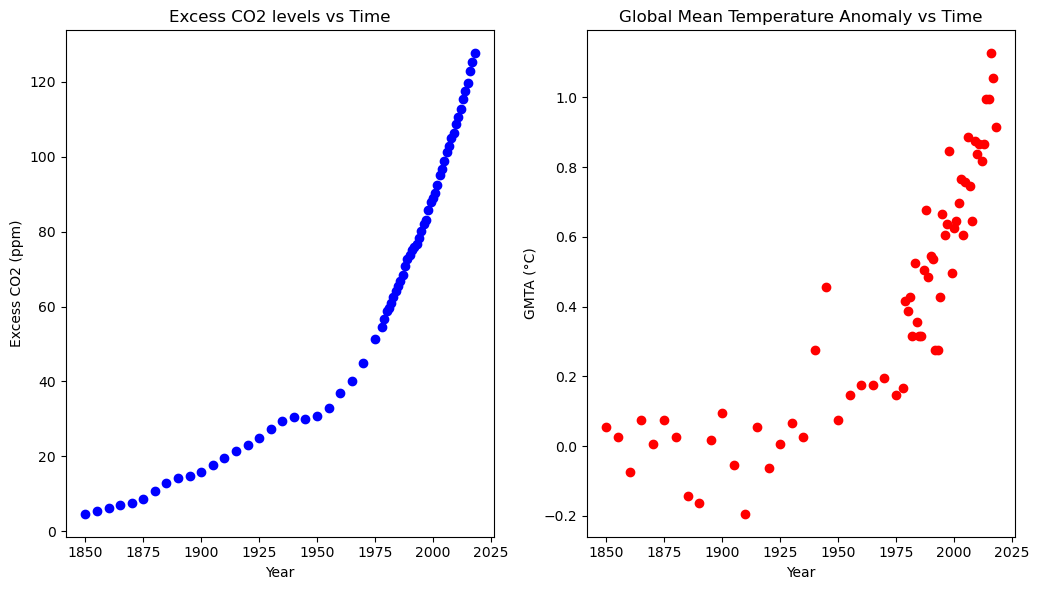

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.5, 6))

# Plotting ECO2 levels vs time on the left
ax1.scatter(df2["Year"], df2["ECO2"], color='blue', label="ECO2")
ax1.set_title("Excess CO2 levels vs Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("Excess CO2 (ppm)")

# Plotting GMTA levels vs time on the right
ax2.scatter(df2["Year"], df2["GMTA"], color='red', label="GMTA")
ax2.set_title("Global Mean Temperature Anomaly vs Time")
ax2.set_xlabel("Year")
ax2.set_ylabel("GMTA (°C)")

plt.tight_layout()
plt.savefig("plots/co2_global-temp_timeseries_raw.png")
plt.show()

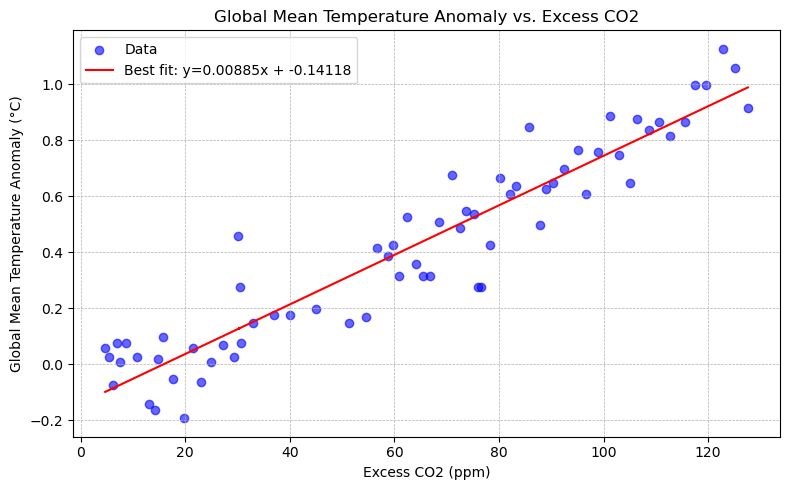

EVR: 0.8900
UVR: 0.1100


In [20]:
# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df2['ECO2'], df2['GMTA'], color='blue', alpha=0.6, label='Data')
plt.title('Global Mean Temperature Anomaly vs. Excess CO2')
plt.xlabel('Excess CO2 (ppm)')
plt.ylabel('Global Mean Temperature Anomaly (°C)')

# If you wish to show a line of best fit, you can use np.polyfit
m, b = np.polyfit(df2['ECO2'], df2['GMTA'], 1)
plt.plot(df2['ECO2'], m*df2['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("plots/gmta_vs_eco2_raw.png")
plt.show()

# Calculate EVR and UVR
y_pred = m*df2['ECO2'] + b
residuals = df2['GMTA'] - y_pred

total_variance = np.var(df2['GMTA'])
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

EVR = explained_variance / total_variance
UVR = unexplained_variance / total_variance

# Print EVR and UVR
print(f"EVR: {EVR:.4f}")
print(f"UVR: {UVR:.4f}")

In [21]:
df2_outliers = (
    df2[(df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992)]
)
df2_outliers.head()

,Year,GMTA,ECO2
19,1945,0.456364,30.10
40,1992,0.276364,75.90
41,1993,0.276364,76.63


In [22]:
df3 = df2[~((df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992))]
df3.sample(10)

,Year,GMTA,ECO2
31,1983,0.526364,62.47
58,2010,0.836364,108.71
44,1996,0.606364,82.01
39,1991,0.536364,75.15
7,1885,-0.143636,13.00
6,1880,0.026364,10.70
15,1925,0.006364,25.00
64,2016,1.126364,122.87
26,1978,0.166364,54.60
55,2007,0.746364,102.89


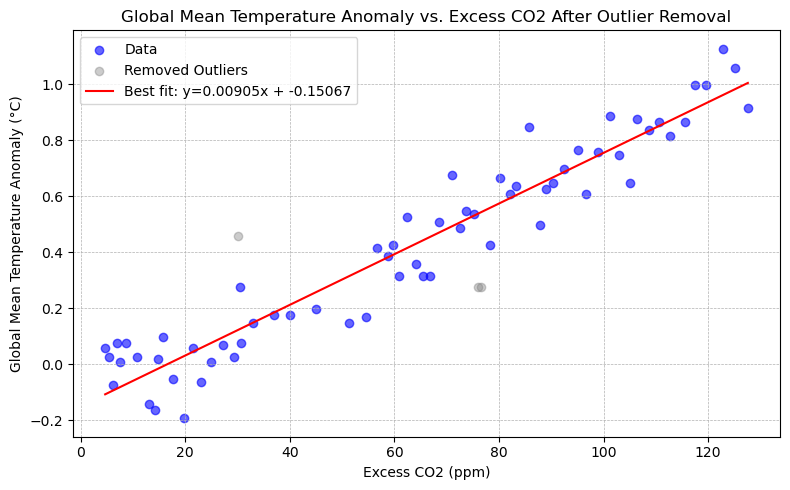

EVR: 0.9202
UVR: 0.0798


In [23]:
# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df3['ECO2'], df3['GMTA'], color='blue', alpha=0.6, label='Data')
plt.scatter(df2_outliers['ECO2'], df2_outliers['GMTA'], color='grey', alpha=0.4, label='Removed Outliers')
plt.title('Global Mean Temperature Anomaly vs. Excess CO2 After Outlier Removal')
plt.xlabel('Excess CO2 (ppm)')
plt.ylabel('Global Mean Temperature Anomaly (°C)')

# If you wish to show a line of best fit, you can use np.polyfit
m, b = np.polyfit(df3['ECO2'], df3['GMTA'], 1)
plt.plot(df3['ECO2'], m*df3['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("plots/gmta_vs_eco2_outlier_removal.png")
plt.show()

# Calculate EVR and UVR
y_pred = m*df3['ECO2'] + b
residuals = df3['GMTA'] - y_pred

total_variance = np.var(df3['GMTA'])
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

EVR = explained_variance / total_variance
UVR = unexplained_variance / total_variance

# Print EVR and UVR
print(f"EVR: {EVR:.4f}")
print(f"UVR: {UVR:.4f}")

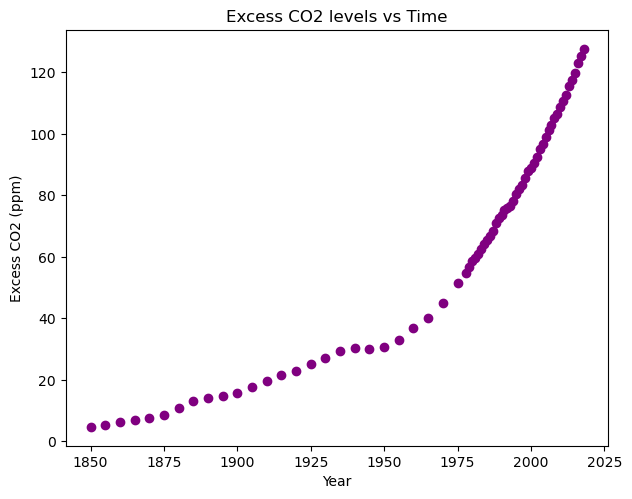

In [45]:
import matplotlib.gridspec as gridspec

# Create a gridspec layout
# fig = plt.figure(figsize=(12, 10))
# gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])

# (a) Plot - ECO2 levels vs Time
# ax1 = plt.subplot(gs[0])
fig, ax = plt.subplots(figsize=(7,5.4))
ax.scatter(df2["Year"], df2["ECO2"], color='purple', label="ECO2")
ax.set_title("Excess CO2 levels vs Time")
ax.set_xlabel("Year")
ax.set_ylabel("Excess CO2 (ppm)")
fig.savefig("plots/co2_ts.png")

# Data filtering for (c) plot
# df3 = df2[~((df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992))]
# # df2_outliers = ...  # Get your outliers

# # (c) Plot - GMTA vs ECO2 with outliers removed
# ax3 = plt.subplot(gs[2:])
# ax3.scatter(df3['ECO2'], df3['GMTA'], color='blue', alpha=0.6, label='Data')
# ax3.scatter(df2_outliers['ECO2'], df2_outliers['GMTA'], color='grey', alpha=0.4, label='Removed Outliers')
# ax3.set_title('Global Mean Temperature Anomaly vs. Excess CO2 After Outlier Removal')
# ax3.set_xlabel('Excess CO2 (ppm)')
# ax3.set_ylabel('Global Mean Temperature Anomaly (°C)')
# m, b = np.polyfit(df3['ECO2'], df3['GMTA'], 1)
# ax3.plot(df3['ECO2'], m*df3['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')
# ax3.legend()
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

# plt.tight_layout()
# plt.savefig("plots/combined_plot.png")
# plt.show()

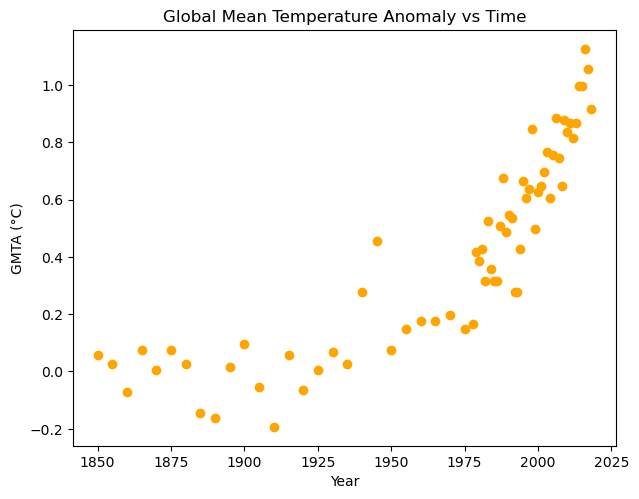

In [46]:
fig, ax = plt.subplots(figsize=(7,5.4))
ax.scatter(df2["Year"], df2["GMTA"], color='orange', label="GMTA")
ax.set_title("Global Mean Temperature Anomaly vs Time")
ax.set_xlabel("Year")
ax.set_ylabel("GMTA (°C)")
fig.savefig("plots/gmta_ts")

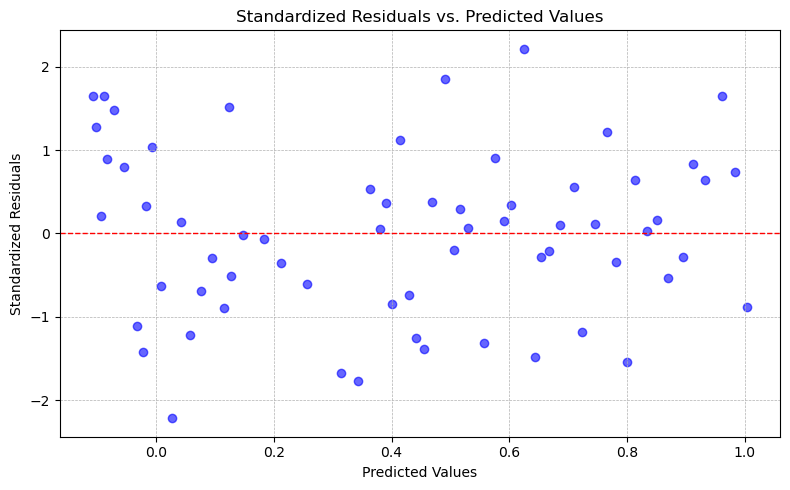

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate standardized residuals
std_residuals = residuals / np.std(residuals)

plt.figure(figsize=(8, 5))

# Scatter plot of standardized residuals vs. predicted values
plt.scatter(y_pred, std_residuals, alpha=0.6, color='blue')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Labeling the axes and the plot
plt.title("Standardized Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")

# Optional: adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save the figure
plt.savefig("plots/standardized_residuals_plot.png")
plt.show()


In [49]:
df3[df3["Year"] == 2018]

,Year,GMTA,ECO2
66,2018,0.916364,127.58


## Section 3

In [80]:
from typing import List

def compute_ECO2(year: int) -> float:
    r: float = 3 / 110
    ECO2: float = 134  # Starting value at 2020
    
    for i in range(2021, year + 1):
        ECO2 += 2.5 * (1 + r) ** (i - 2021)
    return ECO2

def projected_ECO2_values() -> List[float]:
    eco2: List[float] = [134]
    eco2_addons: List[float] = [
        compute_ECO2(year) 
        for year in range(2021, 2101)
    ]
    for eco2_val in eco2_addons:
        eco2.append(eco2_val)
    return eco2

ECO2_values: List[float] = projected_ECO2_values()
print(ECO2_values)

[134, 136.5, 139.0681818181818, 141.7064049586777, 144.4165796393689, 147.20066817498807, 150.06068639794228, 152.99870511788615, 156.0168516211012, 159.1173112107676, 162.3023287892431, 165.57421048349516, 168.9353253148632, 172.38810691435947, 175.9350552847511, 179.57873861069885, 183.32179511826337, 187.1669349851251, 191.11694230290124, 195.17467709298037, 199.3430773773344, 203.62516130580715, 208.0240293414201, 212.542866505277, 217.18494468269367, 221.95362499222168, 226.85236021928228, 231.8846973161718, 237.05427997024924, 242.36485124216514, 247.8202562760424, 253.42444508357082, 259.18147540403186, 265.0955156423236, 271.1708478871143, 277.41187101130834, 283.8231038570713, 290.40918850771874, 297.17489364883835, 304.1251180210794, 311.26489396710883, 318.5993910753027, 326.133919922811, 333.8739359207059, 341.8250432639979, 349.99299898937966, 358.38371714363547, 367.0032730657346, 375.8579077857092, 384.9540325435013, 394.29823343105136, 403.8972761609891, 413.75811096537

In [81]:
def predict_gmta(eco2: float) -> float:
    return m*eco2 + b

In [82]:
len(ECO2_values)

81

In [83]:
years_since_2020: List[float] = [
    (2020+i) for i in range(2020, 2101)
]
len(years_since_2020)

81

In [84]:
df4 = pd.DataFrame({
    "year": [(2020+i) for i in range(2101-2020)],
    "years_since_2020": [i for i in range(2101-2020)],
    "eco2_predictions": ECO2_values,
})

In [85]:
df4.head()

,year,years_since_2020,eco2_predictions
0,2020,0,134.000000
1,2021,1,136.500000
2,2022,2,139.068182
3,2023,3,141.706405
4,2024,4,144.416580


In [86]:
df4["gmta_predictions"] = df4["eco2_predictions"].apply(
    predict_gmta
)
df4.head()

,year,years_since_2020,eco2_predictions,gmta_predictions
0,2020,0,134.000000,1.062502
1,2021,1,136.500000,1.085136
2,2022,2,139.068182,1.108387
3,2023,3,141.706405,1.132272
4,2024,4,144.416580,1.156809


In [87]:
df4[df4["year"] == 2100]

,year,years_since_2020,eco2_predictions,gmta_predictions
80,2100,80,831.324435,7.375731


import matplotlib.pyplot as plt

# Extracting years for plotting x-axis values
years_past = df3.index
years_future = df4["year"]

# Actual past GMTA values
actual_gmta = df3["GMTA"]

# Predicted past GMTA values using linear regression
predicted_gmta_past = m * df3["ECO2"] + b

# Predicted future GMTA values
predicted_gmta_future = df4["gmta_predictions"]

plt.figure(figsize=(12, 6))

# Plotting data
plt.scatter(years_past, actual_gmta, color='blue', marker='s', label='Past Actual GMTA')
plt.plot(years_past, predicted_gmta_past, color='green', label='Past Fitted GMTA')
plt.plot(years_future, predicted_gmta_future, color='red', label='Future Predicted GMTA')

# Labels, titles, and legend
plt.xlabel('Year')
plt.ylabel('GMTA')
plt.title('GMTA Levels Over Time')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


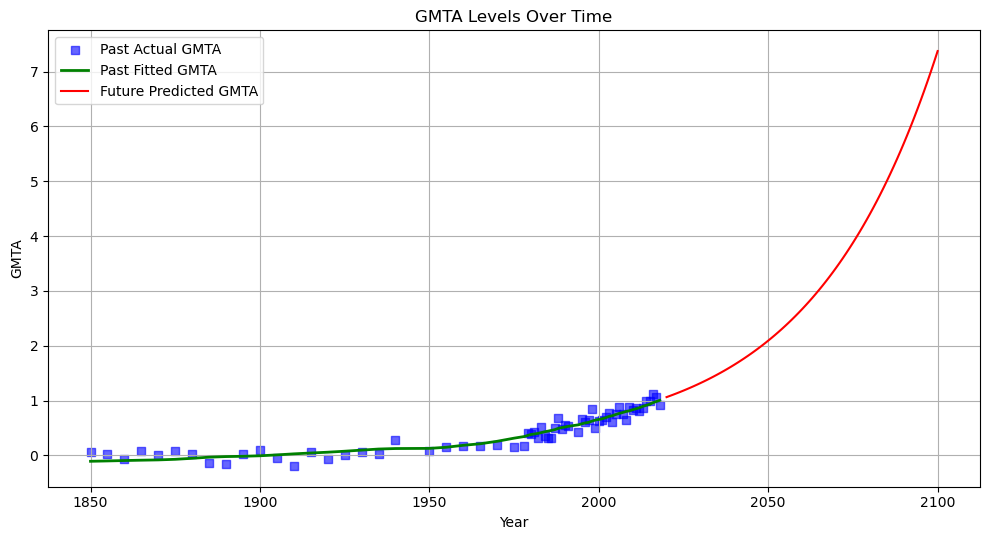

In [98]:
import matplotlib.pyplot as plt

# Extracting years for plotting x-axis values
years_past = df3["Year"]
years_future = df4["year"]

# Actual past GMTA values
actual_gmta = df3["GMTA"]

# Predicted past GMTA values using linear regression
predicted_gmta_past = m * df3["ECO2"] + b

# Predicted future GMTA values
predicted_gmta_future = df4["gmta_predictions"]

plt.figure(figsize=(10, 5.5))

# Plotting data
plt.scatter(years_past, actual_gmta, color='blue', marker='s', label='Past Actual GMTA', alpha=0.6)
plt.plot(years_past, predicted_gmta_past, color='green', label='Past Fitted GMTA', lw=2)
plt.plot(years_future, predicted_gmta_future, color='red', label='Future Predicted GMTA')

# Labels, titles, and legend
plt.xlabel('Year')
plt.ylabel('GMTA')
plt.title('GMTA Levels Over Time')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig("plots/pred-gmta1.png")
plt.show()


In [99]:
df4[df4["gmta_predictions"] >= 1.5]

,year,years_since_2020,eco2_predictions,gmta_predictions
16,2036,16,183.321795,1.509037
17,2037,17,187.166935,1.543849
18,2038,18,191.116942,1.579611
19,2039,19,195.174677,1.616347
20,2040,20,199.343077,1.654086
...,...,...,...,...
76,2096,76,750.815743,6.646846
77,2097,77,770.137990,6.821780
78,2098,78,789.987208,7.001485
79,2099,79,810.377768,7.186091


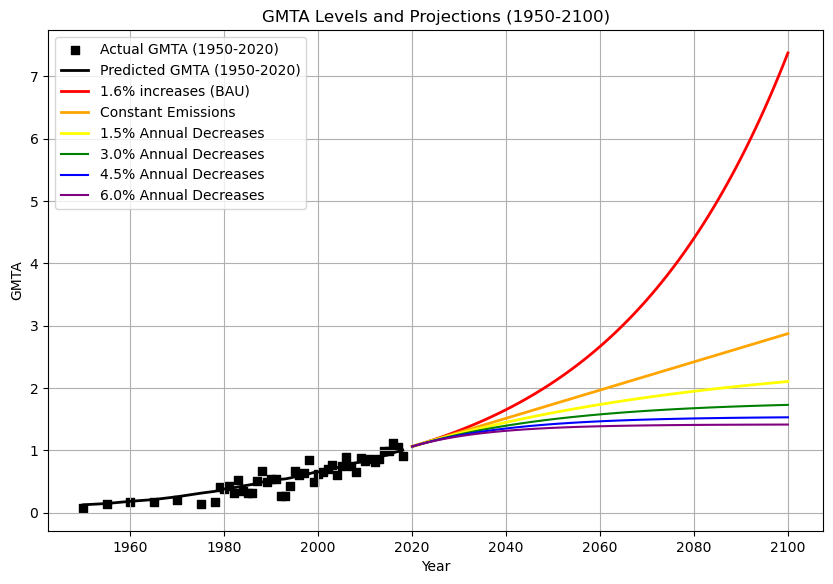

In [120]:
years_1950_2020 = np.arange(1950, 2021, 1)

# Filter df2 based on the condition that the year is between 1950 and 2020
filtered_df = df2[df2["Year"].between(1950, 2020)]

# Extract the actual and predicted GMTA values
years_1950_2020 = filtered_df["Year"].values
actual_gmta_1950_2020 = filtered_df["GMTA"].values
predicted_gmta_1950_2020 = (m * filtered_df["ECO2"] + b).values

# Given parameters
initial_eco2_2020 = 134  # The initial ECO2 value at 2020
emission_rate_2020 = 2.5  # Given rate in 2020

########################################################################################
########################################################################################
########## Constant Case  ##############################################################
########################################################################################

years_2020_2100 = np.arange(2020, 2101, 1)

# Calculate the ECO2 levels for each year from 2020 to 2100
# assuming constant emissions (i.e., constant yearly increase)
eco2_constant = [initial_eco2_2020 + emission_rate_2020 * (year - 2020) for year in years_2020_2100]

# Predict the GMTA values for the constant emissions scenario
gmta_constant = [m*eco2 + b for eco2 in eco2_constant]

########################################################################################
########################################################################################
########## 1.5 Decrease #############################################################
########################################################################################
decrease_rate = 0.015  # 1.5% decrease
current_rate = emission_rate_2020  # starting with the emission rate in 2020

eco2_1_5_decrease = [initial_eco2_2020]  # starting with the initial ECO2 value at 2020

# Compute the ECO2 levels from 2021 to 2100 with a 1.5% annual decrease in emissions
for year in years_2020_2100[1:]:
    current_rate = current_rate * (1 - decrease_rate)  # decrease the rate
    next_eco2 = eco2_1_5_decrease[-1] + current_rate  # compute the next year's ECO2 level
    eco2_1_5_decrease.append(next_eco2)

# Predict the GMTA values for the 1.5% decrease scenario
gmta_1_5_decrease = [m*eco2 + b for eco2 in eco2_1_5_decrease]

########################################################################################
########################################################################################
########## 3.0 Decrease #############################################################
########################################################################################

decrease_rate_3 = 0.03  # 3.0% decrease
current_rate_3 = emission_rate_2020  # starting with the emission rate in 2020

eco2_3_0_decrease = [initial_eco2_2020]  # starting with the initial ECO2 value at 2020

# Compute the ECO2 levels from 2021 to 2100 with a 3.0% annual decrease in emissions
for year in years_2020_2100[1:]:
    current_rate_3 = current_rate_3 * (1 - decrease_rate_3)  # decrease the rate
    next_eco2 = eco2_3_0_decrease[-1] + current_rate_3  # compute the next year's ECO2 level
    eco2_3_0_decrease.append(next_eco2)

# Predict the GMTA values for the 3.0% decrease scenario
gmta_3_0_decrease = [m*eco2 + b for eco2 in eco2_3_0_decrease]

########################################################################################
########################################################################################
########## 4.5 Decrease #############################################################
########################################################################################

decrease_rate_4_5 = 0.045  # 4.5% decrease
current_rate_4_5 = emission_rate_2020  # starting with the emission rate in 2020

eco2_4_5_decrease = [initial_eco2_2020]  # starting with the initial ECO2 value at 2020

# Compute the ECO2 levels from 2021 to 2100 with a 4.5% annual decrease in emissions
for year in years_2020_2100[1:]:
    current_rate_4_5 = current_rate_4_5 * (1 - decrease_rate_4_5)  # decrease the rate
    next_eco2 = eco2_4_5_decrease[-1] + current_rate_4_5  # compute the next year's ECO2 level
    eco2_4_5_decrease.append(next_eco2)

# Predict the GMTA values for the 4.5% decrease scenario
gmta_4_5_decrease = [m*eco2 + b for eco2 in eco2_4_5_decrease]

########################################################################################
########################################################################################
########## 6.0 Decrease #############################################################
########################################################################################

decrease_rate_6_0 = 0.060  # 6.0% decrease
current_rate_6_0 = emission_rate_2020  # starting with the emission rate in 2020

eco2_6_0_decrease = [initial_eco2_2020]  # starting with the initial ECO2 value at 2020

# Compute the ECO2 levels from 2021 to 2100 with a 6.0% annual decrease in emissions
for year in years_2020_2100[1:]:
    current_rate_6_0 = current_rate_6_0 * (1 - decrease_rate_6_0)  # decrease the rate
    next_eco2 = eco2_6_0_decrease[-1] + current_rate_6_0  # compute the next year's ECO2 level
    eco2_6_0_decrease.append(next_eco2)

# Predict the GMTA values for the 6.0% decrease scenario
gmta_6_0_decrease = [m*eco2 + b for eco2 in eco2_6_0_decrease]

########################################################################################
########################################################################################
########## PLOT PLOT PLOT #############################################################
########################################################################################

# Initialize the figure and axis
plt.figure(figsize=(10, 6.5))
plt.grid(True)

# Plot actual and predicted historical data
plt.scatter(years_1950_2020, actual_gmta_1950_2020, color='black', marker='s', label='Actual GMTA (1950-2020)')
plt.plot(years_1950_2020, predicted_gmta_1950_2020, color='black', linewidth=2, label='Predicted GMTA (1950-2020)')

# # You will need to compute these predictions for different scenarios, but for demonstration:
plt.plot(years_future, predicted_gmta_future, color='red', label='1.6% increases (BAU)', lw=2)
plt.plot(years_2020_2100, gmta_constant, color='orange', label='Constant Emissions', lw=2)
plt.plot(years_2020_2100, gmta_1_5_decrease, color='yellow', label='1.5% Annual Decreases', lw=2)
plt.plot(years_2020_2100, gmta_3_0_decrease, color='green', label='3.0% Annual Decreases')
plt.plot(years_2020_2100, gmta_4_5_decrease, color='blue', label='4.5% Annual Decreases')
plt.plot(years_2020_2100, gmta_6_0_decrease, color='purple', label='6.0% Annual Decreases')

# Add labels, title, legend
plt.xlabel('Year')
plt.ylabel('GMTA')
plt.title('GMTA Levels and Projections (1950-2100)')
plt.legend()
plt.savefig("plots/pred-gmta2.png")

# Display the plot
plt.show()


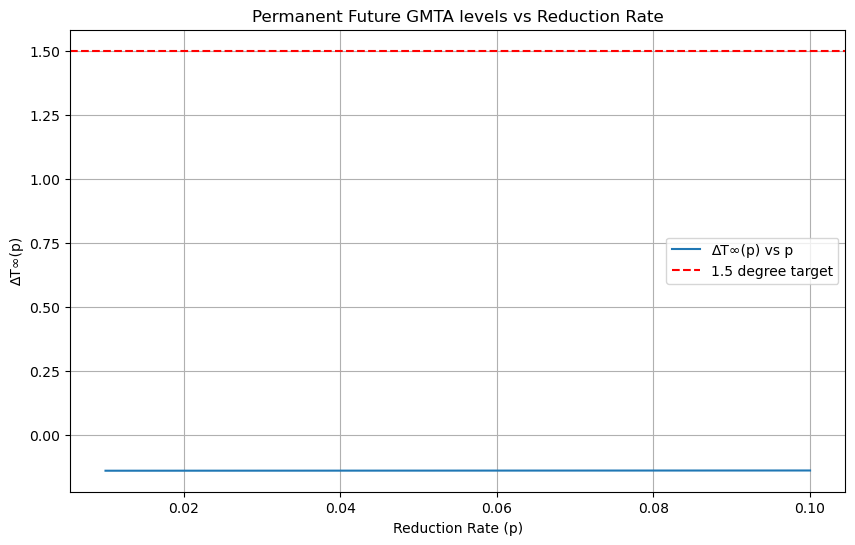

Approximate rate of reduction needed to meet the 1.5 degree target: 0.1


In [130]:
import numpy as np
import matplotlib.pyplot as plt

def delta_C_infinity(p):
    # Based on given information, we need to determine this function.
    # For simplicity, let's assume a model. (You might need to update this)
    return 134 * (1-p)

def delta_T_infinity(p):
    return m * delta_C_infinity(p) + b

# Values for p
p_values = np.linspace(0.01, 0.1, 1000)
T_values = [delta_T_infinity(p) for p in p_values]

# Plot
plt.figure(figsize=(10,6))
plt.plot(p_values, T_values, label=r'∆T∞(p) vs p')
plt.axhline(y=1.5, color='r', linestyle='--', label="1.5 degree target")
plt.xlabel('Reduction Rate (p)')
plt.ylabel('∆T∞(p)')
plt.title('Permanent Future GMTA levels vs Reduction Rate')
plt.legend()
plt.grid(True)
plt.savefig("plots/perm-future-gmta.png")
plt.show()

# Approximate reduction rate for 1.5 degree target
approx_rate = p_values[np.argmin(np.abs(np.array(T_values) - 1.5))]
print(f"Approximate rate of reduction needed to meet the 1.5 degree target: {approx_rate}")


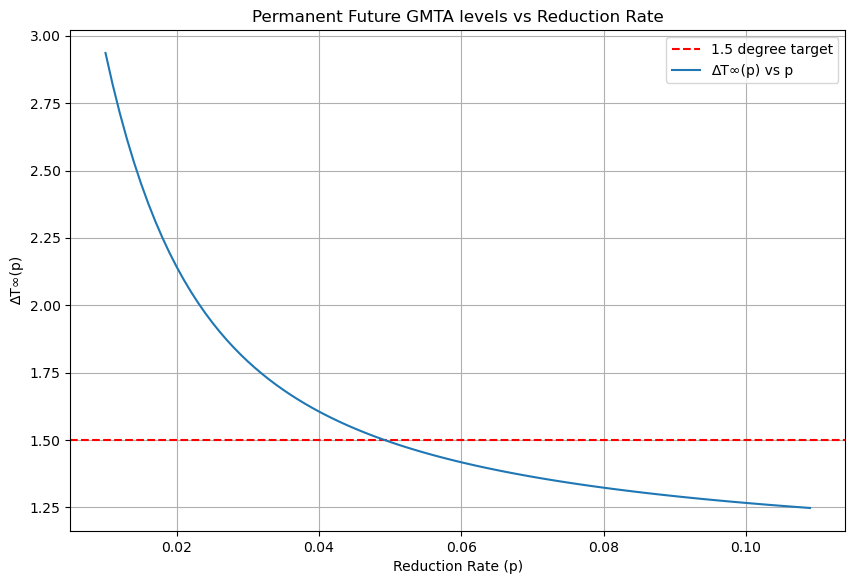

In [137]:
# Assuming that m, b, and other variables from previous code are still defined
years_2020_2200 = np.arange(2020, 2201, 1)

def compute_gmta_for_year(decrease_rate, target_year=2200):
    current_rate = emission_rate_2020
    eco2_values = [initial_eco2_2020]
    
    for year in years_2020_2200[1:]:
        current_rate = current_rate * (1 - decrease_rate)
        next_eco2 = eco2_values[-1] + current_rate
        eco2_values.append(next_eco2)
    
    return m * eco2_values[-1] + b  # Predicted GMTA for target year

# Create an array of decrease rates from 0.01 to 0.1 with step 0.01
decrease_rates = np.arange(0.01, 0.11, 0.001)
gmta_2200_values = [compute_gmta_for_year(rate) for rate in decrease_rates]

# Plotting
plt.figure(figsize=(10, 6.5))
plt.grid(True)
plt.axhline(y=1.5, color='r', linestyle='--', label="1.5 degree target")
plt.plot(decrease_rates, gmta_2200_values, '-', label="∆T∞(p) vs p")
plt.xlabel('Reduction Rate (p)')
plt.ylabel('∆T∞(p)')
plt.title('Permanent Future GMTA levels vs Reduction Rate')
plt.savefig("plots/perm-future-gmta.png")
plt.legend()
plt.show()


In [138]:
for i in range(len(gmta_2200_values)):
    if gmta_2200_values[i] < 1.5:
        print(decrease_rate[i])
        break

1.492501648900004
